# 2023 Cricket World Cup Batting Analysis

In [638]:
import pandas as pd
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 20)
# Importing the Dataset
batting_df = pd.read_csv("icc_wc_23_bat.csv")
batting_df.head()

,player,dismissal,runs,balls,minutes,4s,6s,strike_rate,team,opponent,innings,match_id
0,Rohit Sharma,b Madushanka,4,2,2,1,0,200.00,India,Sri Lanka,1,0
1,Shubman Gill,c Mendis b Madushanka,92,92,136,11,2,100.00,India,Sri Lanka,1,0
2,Virat Kohli,c Nissanka b Madushanka,88,94,139,11,0,93.61,India,Sri Lanka,1,0
3,Shreyas Iyer,c Theekshana b Madushanka,82,56,84,3,6,146.42,India,Sri Lanka,1,0
4,KL Rahul,c Hemantha b Chameera,21,19,34,2,0,110.52,India,Sri Lanka,1,0


### Lets see what all columns we have

In [639]:
batting_df.columns

Index(['player', 'dismissal', 'runs', 'balls', 'minutes', '4s', '6s',
       'strike_rate', 'team', 'opponent', 'innings', 'match_id'],
      dtype='object')

## Checking for Missing Values

In [640]:
batting_df.isna().sum()

player         0
dismissal      0
runs           0
balls          0
minutes        0
4s             0
6s             0
strike_rate    0
team           0
opponent       0
innings        0
match_id       0
dtype: int64

So we don't have any missing data in our dataset.

## Getting all the teams who has participated in the world cup

In [641]:
teams = batting_df['team'].unique()
print("These are the teams who have participated in the world cup 2023",teams)

These are the teams who have participated in the world cup 2023 ['India' 'Pakistan' 'Netherlands' 'South Africa' 'Bangladesh' 'Sri Lanka'
 'New Zealand' 'Australia' 'England' 'Afghanistan']


## Let's see who has scored the Highest run in the World Cup

In [642]:
Highest_run=batting_df.loc[batting_df['runs'].idxmax()]
Highest_run

player         Glenn Maxwell
dismissal            not out
runs                     201
balls                    128
minutes                  181
4s                        21
6s                        10
strike_rate           157.03
team               Australia
opponent         Afghanistan
innings                    2
match_id                  27
Name: 700, dtype: object

The Highest run scored was **201 for 128 balls** by **Glenn Maxwell** from **Australia** against **Afghanistan**

## Top 5 total runs scorers in ICC Cricket World Cop 2023

In [643]:
top_5_runs = batting_df.groupby(['player','team'])['runs'].sum().nlargest(5).reset_index().sort_values(by='runs',ascending=False)
top_5_runs

,player,team,runs
0,Virat Kohli,India,765
1,Rohit Sharma,India,597
2,Quinton de Kock,South Africa,594
3,Rachin Ravindra,New Zealand,578
4,Daryl Mitchell,New Zealand,552


## Least 5 runs in ICC Cricket World Cop 2023

In [644]:
least_5_runs = batting_df.groupby('player')['runs'].sum().nsmallest(5).reset_index().sort_values(by='runs',ascending=False)
least_5_runs

,player,runs
3,Dushan Hemantha,4
4,Josh Hazlewood,4
2,Fazalhaq Farooqi,2
0,Alex Carey,0
1,Usama Mir,0


##  5 Highest runs scored by players in each match

In [645]:
highest_runs_in_match = batting_df.loc[batting_df.groupby('player')['runs'].idxmax()].nlargest(5, 'runs')[['player', 'runs','balls', 'opponent']]
highest_runs_in_match

,player,runs,balls,opponent
700,Glenn Maxwell,201,128,Afghanistan
656,Mitchell Marsh,177,132,Bangladesh
52,Quinton de Kock,174,140,Bangladesh
365,David Warner,163,124,Pakistan
621,Devon Conway,152,121,England


## Century with less than 50 balls

In [646]:
century = 100
half_century = 50

In [647]:
century_with_lessthan_fifty_balls = batting_df[(batting_df['runs']>=century)&(batting_df['balls']<=50)]
century_with_lessthan_fifty_balls

,player,dismissal,runs,balls,minutes,4s,6s,strike_rate,team,opponent,innings,match_id
315,Glenn Maxwell,c Engelbrecht b van Beek,106,44,53,9,8,240.9,Australia,Netherlands,1,31


Glenn Maxwell was the only player who hit a century with 44 balls played

## Most 100s in the World Cup 2023

In [648]:
most_hundresd = batting_df[batting_df['runs']>=100].groupby('player')['runs'].count().sort_values(ascending=False).nlargest(10)
most_hundresd

player
Quinton de Kock          4
Virat Kohli              3
Rachin Ravindra          3
Travis Head              2
Shreyas Iyer             2
Daryl Mitchell           2
David Warner             2
Rassie van der Dussen    2
Glenn Maxwell            2
Mitchell Marsh           2
Name: runs, dtype: int64

## Most 50s in the World Cup 2023

In [649]:
most_fifties = batting_df[(batting_df['runs']>=50)&(batting_df['runs']<100)].groupby('player')['runs'].count().sort_values(ascending=False).nlargest(10)
print('Most half centuries:')
most_fifties

Most half centuries:


player
Virat Kohli             6
Shubman Gill            4
Pathum Nissanka         4
Babar Azam              4
Hashmatullah Shahidi    3
Rahmat Shah             3
Rohit Sharma            3
Kane Williamson         3
Shreyas Iyer            3
Abdullah Shafique       3
Name: runs, dtype: int64

# Strike Rate Analysis:

## Average strike rate for each player

In [650]:
Average_strike_rate_of_players = batting_df.groupby('player').agg({'strike_rate': 'mean', 'innings': 'count','runs':'sum'}).sort_values(by='strike_rate',ascending=False)
Average_strike_rate_of_players

,strike_rate,innings,runs
player,,,
David Willey,163.933333,6,78
Aiden Markram,151.525000,10,406
Hardik Pandya,137.500000,1,11
Reece Topley,132.140000,2,16
Rohit Sharma,127.897273,11,597
...,...,...,...
Lungi Ngidi,19.243333,3,11
Dushmantha Chameera,18.610000,4,6
Fazalhaq Farooqi,16.666667,3,2


## Highest career strike rate among players with at least a certain number of innings

In [651]:
min_innings = 5 

# Calculate average strike rate for each player
average_strike_rate = batting_df.groupby('player').agg({'strike_rate': 'mean', 'innings': 'count'})

# Filter players with at least the minimum number of innings
qualified_players = average_strike_rate[average_strike_rate['innings'] >= min_innings]

# Find the player with the highest average strike rate
highest_strike_rate_player = qualified_players['strike_rate'].idxmax()

# result
print(f"The player with the highest career strike rate (with at least {min_innings} innings) is: {highest_strike_rate_player}")


The player with the highest career strike rate (with at least 5 innings) is: David Willey


## Calculating the standard deviation of the strike rates for each player to assess how consistent or variable their performance is.

In [652]:
min_innings_threshold = 5

# Calculate the standard deviation of strike rates for each player with a minimum number of innings
strike_rate_std = batting_df.groupby('player')['strike_rate'].std(ddof=0)
strike_rate_std = strike_rate_std[batting_df.groupby('player')['innings'].count() >= min_innings_threshold]
strike_rate_std.sort_values(ascending=True).reset_index()


,player,strike_rate
0,Imam-ul-Haq,12.455301
1,Sybrand Engelbrecht,12.830838
2,Dhananjaya de Silva,13.766999
3,Mustafizur Rahman,13.911468
4,Ibrahim Zadran,14.696153
...,...,...
90,Shoriful Islam,78.485916
91,Mark Wood,79.074113
92,Glenn Maxwell,84.147851
93,David Willey,96.499022


This standard deviation can be interpreted as a measure of how consistent or variable a player's strike rate is across their innings. A lower standard deviation suggests more consistent performance, while a higher standard deviation indicates greater variability.

In [653]:
batting_df.head()

,player,dismissal,runs,balls,minutes,4s,6s,strike_rate,team,opponent,innings,match_id
0,Rohit Sharma,b Madushanka,4,2,2,1,0,200.00,India,Sri Lanka,1,0
1,Shubman Gill,c Mendis b Madushanka,92,92,136,11,2,100.00,India,Sri Lanka,1,0
2,Virat Kohli,c Nissanka b Madushanka,88,94,139,11,0,93.61,India,Sri Lanka,1,0
3,Shreyas Iyer,c Theekshana b Madushanka,82,56,84,3,6,146.42,India,Sri Lanka,1,0
4,KL Rahul,c Hemantha b Chameera,21,19,34,2,0,110.52,India,Sri Lanka,1,0


# Dismissal

## Most common dismissal modes among the players

In [654]:
most_common_dismissals = batting_df['dismissal'].value_counts()
most_common_dismissals.reset_index()

,index,dismissal
0,not out,145
1,c Rahul b Mohammed Shami,8
2,lbw b Zampa,8
3,b Bumrah,7
4,b Mohammed Shami,7
...,...,...
461,run out (Ibrahim Zadran),1
462,c Mohammad Nabi b Fazalhaq Farooqi,1
463,c Rashid Khan b Fazalhaq Farooqi,1
464,c sub (Najibullah Zadran) b Mujeeb Ur Rahman,1


# Innings Distribution

## Innings played by each player

In [655]:
innings_played_by_players = batting_df.groupby('player')['innings'].count().reset_index()
innings_played_by_players.sort_values(by='player')

,player,innings
0,Abdullah Shafique,8
1,Adam Zampa,6
2,Adil Rashid,9
3,Agha Salman,1
4,Aiden Markram,10
...,...,...
141,Usama Mir,1
142,Vikramjit Singh,6
143,Virat Kohli,11
144,Wesley Barresi,4


# Performance Against Opponents

## Players Average runs against opponents

In [656]:
import re

def get_average_runs_against_opponents(df, player_input):
    # Convert input to lowercase
    player_input = player_input.lower()

    # Use a case-insensitive and partial match to find the player
    matching_players = df['player'].str.contains(re.escape(player_input), case=False, na=False)

    # Filter the DataFrame for the selected player(s)
    player_data = df[matching_players]

    # Group by player and opponent, and calculate average runs against each opponent
    average_runs_against_opponent = player_data.groupby(['player', 'opponent'])['runs'].mean().reset_index().sort_values(by='runs', ascending=False)

    return average_runs_against_opponent

# Input for player name
selected_player_input = input("Enter player name: ")

# Call the function
result = get_average_runs_against_opponents(batting_df, selected_player_input)

# Display the result
result


,player,opponent,runs
5,Virat Kohli,New Zealand,106.0
2,Virat Kohli,Bangladesh,103.0
7,Virat Kohli,South Africa,101.0
8,Virat Kohli,Sri Lanka,88.0
1,Virat Kohli,Australia,69.5
0,Virat Kohli,Afghanistan,55.0
4,Virat Kohli,Netherlands,51.0
6,Virat Kohli,Pakistan,16.0
3,Virat Kohli,England,0.0


## Players consistent performs with opponents

In [657]:
def analyze_player_performance(df, player_input):
    # Converting input to lowercase
    player_input = player_input.lower()

    # Using a case-insensitive and partial match to find the player
    matching_players = df['player'].str.contains(re.escape(player_input), case=False, na=False)

    # Filter the DataFrame for the selected player(s)
    player_data = df[matching_players]

    # Group by opponent and calculate average runs against each opponent
    average_runs_against_opponent = player_data.groupby('opponent')['runs'].mean().reset_index().sort_values(by='runs', ascending=False)

    # Identify opponents where the player consistently performs well or poorly
    threshold = player_data['runs'].mean()  # Adjust the threshold as needed
    consistent_performers = average_runs_against_opponent[average_runs_against_opponent['runs'] > threshold]
    poor_performers = average_runs_against_opponent[average_runs_against_opponent['runs'] < threshold]

    return average_runs_against_opponent, consistent_performers, poor_performers

# Input for player name
selected_player_input = input("Enter player name: ")

# Calling the function
average_runs, consistent_performers, poor_performers = analyze_player_performance(batting_df, selected_player_input)

# Displaying the results
print(f"Average runs against each opponent for {selected_player_input}:\n")
print(average_runs)

print(f"\nOpponents where {selected_player_input} consistently performs well:\n")
print(consistent_performers)

print(f"\nOpponents where {selected_player_input} consistently performs poorly:\n")
print(poor_performers)


Average runs against each opponent for Rohit:

       opponent   runs
0   Afghanistan  131.0
3       England   87.0
6      Pakistan   86.0
4   Netherlands   61.0
2    Bangladesh   48.0
5   New Zealand   46.5
7  South Africa   40.0
1     Australia   23.5
8     Sri Lanka    4.0

Opponents where Rohit consistently performs well:

      opponent   runs
0  Afghanistan  131.0
3      England   87.0
6     Pakistan   86.0
4  Netherlands   61.0

Opponents where Rohit consistently performs poorly:

       opponent  runs
2    Bangladesh  48.0
5   New Zealand  46.5
7  South Africa  40.0
1     Australia  23.5
8     Sri Lanka   4.0


# Distribution of runs scored by each player

In [658]:
# Calculating the summary statistics for runs scored by each player
player_runs_summary = batting_df.groupby('player')['runs'].describe()
print("Summary Statistics for Runs Scored by Each Player:\n")
player_runs_summary

Summary Statistics for Runs Scored by Each Player:



,count,mean,std,min,25%,50%,75%,max
player,,,,,,,,
Abdullah Shafique,8.0,42.000000,40.067800,0.0,7.75,39.0,65.00,113.0
Adam Zampa,6.0,8.000000,11.099550,0.0,1.00,3.5,9.75,29.0
Adil Rashid,9.0,10.222222,7.742380,0.0,2.00,11.0,15.00,20.0
Agha Salman,1.0,51.000000,NaN,51.0,51.00,51.0,51.00,51.0
Aiden Markram,10.0,40.600000,37.083090,1.0,9.25,33.5,59.00,106.0
...,...,...,...,...,...,...,...,...
Usama Mir,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
Vikramjit Singh,6.0,16.333333,19.500427,2.0,3.25,8.0,21.75,52.0
Virat Kohli,11.0,69.545455,37.534953,0.0,52.50,85.0,98.00,117.0


Statistical Measures for Runs Scored by Each Player:



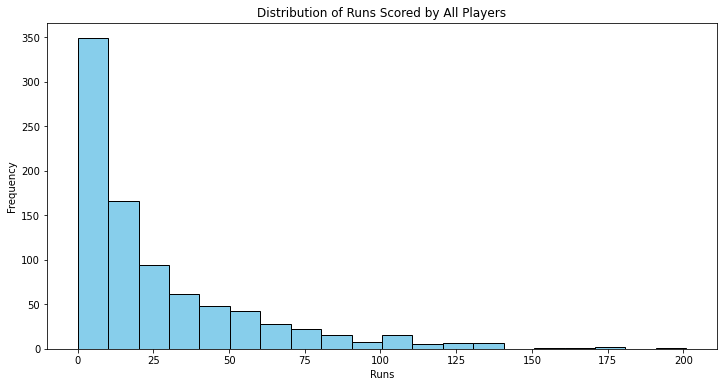

In [659]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by player and calculate statistical measures for runs
player_runs_stats = batting_df.groupby('player')['runs'].describe()

# Displaying statistical measures
print("Statistical Measures for Runs Scored by Each Player:\n")
player_runs_stats

# Creating a histogram for runs scored by each player
plt.figure(figsize=(12, 6))
plt.hist(batting_df['runs'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Runs Scored by All Players')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()


The graph is right skewed and positively distroibuted

## Highest Individual Scores

In [660]:
highest_individual_score = batting_df.groupby('player')['runs'].max().reset_index().sort_values(by='runs',ascending=False)
print("Highest Individual Scores Achieved by Each Player:\n")
print(highest_individual_score)

Highest Individual Scores Achieved by Each Player:

               player  runs
34      Glenn Maxwell   201
82     Mitchell Marsh   177
103   Quinton de Kock   174
21       David Warner   163
24       Devon Conway   152
..                ...   ...
29    Dushan Hemantha     4
32   Fazalhaq Farooqi     2
54     Josh Hazlewood     2
141         Usama Mir     0
5          Alex Carey     0

[146 rows x 2 columns]


## overall highest individual score in a single match

In [661]:
overall_Highest_run=batting_df.loc[batting_df['runs'].idxmax()]
overall_Highest_run[['player', 'runs']]

player    Glenn Maxwell
runs                201
Name: 700, dtype: object

Overall highest individual score in a single match is **201** scored by **Glenn Maxwell**

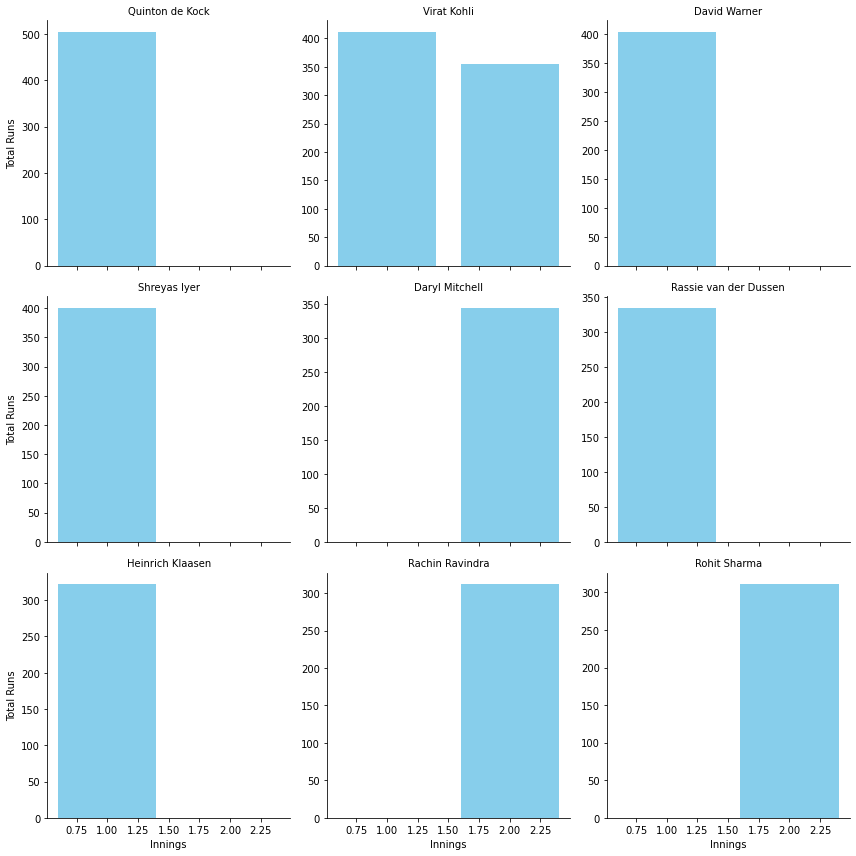

In [662]:
import matplotlib.pyplot as plt
import seaborn as sns
# Group by player and innings, and calculate the total runs in each inning for each player
innings_runs_distribution = batting_df.groupby(['player', 'innings'])['runs'].sum().nlargest(10).reset_index()
innings_runs_distribution

# Creating a FacetGrid to visualize the distribution
g = sns.FacetGrid(innings_runs_distribution, col='player', col_wrap=3, height=4, sharey=False)
g.map(plt.bar, 'innings', 'runs', color='skyblue')
g.set_axis_labels('Innings', 'Total Runs')
g.set_titles(col_template="{col_name}")
plt.show()

By seeing this distribution among both the innings we can see that Virat Kohli's level of consistency in the batting performance is so good.

In [663]:
pd.set_option('display.max_rows', 20)

# Grouping by player and team, and calculating the total runs scored by each player for each team
player_team_runs = batting_df.groupby(['player', 'team'])['runs'].sum().reset_index()

# Calculating the total runs scored by each team
team_total_runs = batting_df.groupby('team')['runs'].sum().reset_index()

# Merging the two DataFrames to get the total runs scored by each player and the total runs for each team
merged_df = pd.merge(player_team_runs, team_total_runs, on='team', suffixes=('_player', '_team'))

# Calculating the contribution of each player to the total runs of the team
merged_df['contribution_percentage'] = (merged_df['runs_player'] / merged_df['runs_team']) * 100

# Displaying the result
print("Contribution of Each Player to Total Runs Scored by the Team:\n")
merged_df[['player', 'team', 'contribution_percentage']].sort_values(by='contribution_percentage',ascending=False)


Contribution of Each Player to Total Runs Scored by the Team:



,player,team,contribution_percentage
130,Virat Kohli,India,25.181040
53,Quinton de Kock,South Africa,21.420844
113,Rachin Ravindra,New Zealand,21.312684
104,Daryl Mitchell,New Zealand,20.353982
126,Rohit Sharma,India,19.651086
...,...,...,...
66,Dushan Hemantha,Sri Lanka,0.205973
20,Josh Hazlewood,Australia,0.135823
92,Fazalhaq Farooqi,Afghanistan,0.100503
14,Usama Mir,Pakistan,0.000000


Contributions of Each Player to Total Runs Scored by the Team

In [664]:

# Group by player, opponent, and match, and calculate the total runs scored by each player against each opponent in each match
player_opponent_match_runs = batting_df.groupby(['player', 'opponent', 'match_id'])['runs'].sum().reset_index()

# Calculating the total runs scored in each match
match_total_runs = batting_df.groupby('match_id')['runs'].sum().reset_index()

# Merging the two DataFrames to get the total runs scored by each player against each opponent and the total runs for each match
merged_match_df = pd.merge(player_opponent_match_runs, match_total_runs, on='match_id', suffixes=('_player', '_match'))

# Calculating the contribution of each player to the total runs of the match against each opponent
merged_match_df['contribution_percentage'] = (merged_match_df['runs_player'] / merged_match_df['runs_match']) * 100

# Identifying players who are the main contributors in particular matches (e.g., contribution > 20%)
main_contributors = merged_match_df[merged_match_df['contribution_percentage'] > 20]

# Displaying the result
print("Players Who Are Main Contributors in Particular Matches with Opponents:\n")
main_contributors[['player', 'opponent', 'match_id', 'contribution_percentage']].sort_values(by='contribution_percentage',ascending=False)


Players Who Are Main Contributors in Particular Matches with Opponents:



,player,opponent,match_id,contribution_percentage
695,Glenn Maxwell,Afghanistan,27,36.347197
858,Travis Head,India,2,30.376940
834,Mitchell Marsh,Bangladesh,22,30.256410
424,Quinton de Kock,Bangladesh,5,29.591837
329,Devon Conway,England,17,27.586207
...,...,...,...,...
874,Virat Kohli,Bangladesh,32,20.315582
626,Shreyas Iyer,Netherlands,41,20.253165
349,Heinrich Klaasen,England,15,20.222635
442,Shreyas Iyer,South Africa,36,20.209974


These are the players who mainly Contributed in Particular Matches with Opponents


# Runs

In [665]:
#Calculate total matches played, total runs, and average runs for each player
player_stats = batting_df.groupby('player').agg({
    'match_id': 'nunique',   # Count unique match_ids for total matches played
    'runs': ['sum', 'mean']  # Total runs and average runs
}).reset_index()

player_stats.columns = ['player', 'Total Matches', 'Total Runs', 'Average Runs']

# Displaying the result
player_stats = player_stats.sort_values(by='Total Runs',ascending=False)
player_stats


,player,Total Matches,Total Runs,Average Runs
143,Virat Kohli,11,765,69.545455
113,Rohit Sharma,11,597,54.272727
103,Quinton de Kock,10,594,59.400000
104,Rachin Ravindra,10,578,57.800000
18,Daryl Mitchell,9,552,61.333333
...,...,...,...,...
64,Lahiru Kumara,1,4,4.000000
29,Dushan Hemantha,2,4,2.000000
32,Fazalhaq Farooqi,3,2,0.666667
5,Alex Carey,1,0,0.000000


## Most Sixes

In [666]:
most_sixes = batting_df.groupby('player')['6s'].sum().sort_values(ascending=False).reset_index()
most_sixes.columns = ['player', 'Sixes Count']
most_sixes

,player,Sixes Count
0,Rohit Sharma,31
1,David Warner,24
2,Shreyas Iyer,24
3,Glenn Maxwell,22
4,Daryl Mitchell,22
...,...,...
141,Gus Atkinson,0
142,Fazalhaq Farooqi,0
143,Reece Topley,0
144,Ryan Klein,0


## Most fours

In [667]:
most_fours = batting_df.groupby('player')['4s'].sum().sort_values(ascending=False).reset_index()
most_fours.columns = ['player', 'fours Count']
most_fours

,player,fours Count
0,Virat Kohli,68
1,Rohit Sharma,66
2,Quinton de Kock,57
3,Rachin Ravindra,55
4,Devon Conway,54
...,...,...
141,Fazalhaq Farooqi,0
142,Dushmantha Chameera,0
143,Alex Carey,0
144,Shariz Ahmad,0


## Most Boundries

In [668]:
Total_boundries = batting_df.groupby('player')[['4s','6s']].sum().sort_values(by='6s',ascending=False).reset_index()
Total_boundries['Total_boundries'] = Total_boundries['4s'] + Total_boundries['6s']
Total_boundries = Total_boundries.sort_values(by='Total_boundries',ascending=False)
Total_boundries[['player','Total_boundries']]

,player,Total_boundries
0,Rohit Sharma,97
6,Quinton de Kock,78
22,Virat Kohli,77
1,David Warner,74
10,Rachin Ravindra,72
...,...,...
107,Dushmantha Chameera,0
116,Usama Mir,0
120,Josh Hazlewood,0
142,Fazalhaq Farooqi,0


# Concluding the best player of the Tournament based on
- Total Runs
- Centuries
- Strike Rate
- Consistency
- Contribution to Team Wins
- Key Performances
- Impact Against Strong Opponents
- Versatility
- Overall Consensus
- Team's Success

In [669]:
total_runs = batting_df.groupby('player')['runs'].sum()
centuries_count = batting_df[batting_df['runs']>100].groupby('player')['runs'].count()
strike_rate = batting_df.groupby('player')['strike_rate'].mean()
innings_played = batting_df.groupby('player')['innings'].count()
consistency = total_runs / innings_played

# Combine the metrics into a DataFrame
player_stats = pd.DataFrame({
    'Total Runs': total_runs,
    'Centuries': centuries_count,
    'Strike Rate': strike_rate,
    'Consistency': consistency
})

# Step 6: Calculate a composite score (you can adjust weights based on importance)
player_stats['Composite Score'] = (
    0.4 * player_stats['Total Runs'] +
    0.3 * player_stats['Centuries'] +
    0.2 * player_stats['Strike Rate'] +
    0.1 * player_stats['Consistency']
)

# Step 7: Determine the best player
best_player = player_stats.nlargest(1, 'Composite Score')

print("Best Player of the Tournament:")
print(best_player)

Best Player of the Tournament:
             Total Runs  Centuries  Strike Rate  Consistency  Composite Score
player                                                                       
Virat Kohli         765        3.0    83.206364    69.545455       330.495818


# The Best Player of the Tournament is Virat Kohli with an amazing runs scored and the strike rate.

_______________________